# Predecir nivel de adaptabilidad

In [20]:
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from keras import layers
from sklearn.preprocessing import OneHotEncoder

print(tf.__version__)

2.13.0


## Exploracion de los datos
The data is obtained from the csv file "training-ds"

In [2]:
raw_dataset = pd.read_csv("./training-ds.csv")
dataset = raw_dataset.copy()
raw_dataset.head()


,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,3G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Media,Masculino,03-Jun,Bajo
1,3G,No,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Femenino,01-Mar,Moderado
2,3G,Si,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar,Bajo
3,3G,Si,Escuela,Si,Privado,Nov-15,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
4,4G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Buena,Masculino,01-Mar,Alto


### Cleaning Data

If the dataset contains any unknown value the row containing it will be deleted

In [3]:
dataset.isna().sum()

Tipo de Red                 0
Estudiante de Tecnología    0
Nivel de Educación          0
Vive en Ciudad              0
Tipo de Instituto           0
Edad                        0
Dispositivo                 0
Tipo de Internet            0
Situación Financiera        0
Género                      0
Duración de la Clase        0
Nivel de Adaptación         0
dtype: int64

As the dataset does not contain any unknown values, no row will be deleted.

### Correcting the data
The "Edad" column should contain values that indicate an age interval following this format: "21-24". 
But there are values that changed the value of a limit for a month like this: "Nov-15"

The data is corrected using the "correct_age" function.

In [4]:
def correct_number(edad): 
    months = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 
             'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

    for m in months: 
        if m in edad: 
            return edad.replace(m, months[m]) 
        
    return edad

This function is applied to the "Edad" column.

In [5]:
dataset['Edad'] = dataset["Edad"].apply(correct_number)
dataset.head()

,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,3G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Media,Masculino,03-Jun,Bajo
1,3G,No,Escuela,Si,Privado,11-15,Smartphone,Compra Megas,Media,Femenino,01-Mar,Moderado
2,3G,Si,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Mala,Masculino,01-Mar,Bajo
3,3G,Si,Escuela,Si,Privado,11-15,Smartphone,Compra Megas,Media,Masculino,01-Mar,Moderado
4,4G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Buena,Masculino,01-Mar,Alto


Same as the "Edad" column the "Duracion de la clase" column has the number values changed. 
The same function is applied to this column

In [6]:
dataset['Duración de la Clase'] = dataset["Duración de la Clase"].apply(correct_number)
dataset.head()

,Tipo de Red,Estudiante de Tecnología,Nivel de Educación,Vive en Ciudad,Tipo de Instituto,Edad,Dispositivo,Tipo de Internet,Situación Financiera,Género,Duración de la Clase,Nivel de Adaptación
0,3G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Media,Masculino,03-06,Bajo
1,3G,No,Escuela,Si,Privado,11-15,Smartphone,Compra Megas,Media,Femenino,01-03,Moderado
2,3G,Si,Universidad,Si,Privado,21-25,Smartphone,Compra Megas,Mala,Masculino,01-03,Bajo
3,3G,Si,Escuela,Si,Privado,11-15,Smartphone,Compra Megas,Media,Masculino,01-03,Moderado
4,4G,Si,Universidad,Si,Privado,21-25,Computadora,Wifi,Buena,Masculino,01-03,Alto


### One hot encoding

In [7]:
#Tipo de red
dataset['Tipo de Red'].nunique()

3

In [8]:
def one_hot_encoding(colum, val):
    lst =[]
    for elem in dataset[colum]:
        if(elem == val):
            lst.append(1)
        else:
            lst.append(0)
    return lst

In [9]:
# four_g=one_hot_encoding('Tipo de Red','4G')
# three_g=one_hot_encoding('Tipo de Red','3G')
# two_g=one_hot_encoding('Tipo de Red','2G')

In [10]:
# dataset.insert(1, "G4", four_g, True)
# dataset.insert(1, "G3", three_g, True)
# dataset.insert(1, "G2", two_g, True)
# dataset.drop(columns=['Tipo de Red'])
# len(dataset['Estudiante de Tecnología'].unique())

In [11]:
dataset.columns.values

array(['Tipo de Red', 'Estudiante de Tecnología', 'Nivel de Educación',
       'Vive en Ciudad', 'Tipo de Instituto', 'Edad', 'Dispositivo',
       'Tipo de Internet', 'Situación Financiera', 'Género',
       'Duración de la Clase', 'Nivel de Adaptación'], dtype=object)

In [12]:
def hot_one_dataset(dataset):
    new_dataset=pd.DataFrame()
    for i in dataset.columns.values:
        if(len(dataset[i].unique())>2):
            for j in dataset[i].unique():
                new_dataset.insert(0, str(i+" "+j), one_hot_encoding(i, j), True)
        else:
            new_dataset.insert(0, str(i), one_hot_encoding(i, dataset[i].unique()[0]), True)
    return new_dataset

In [13]:
tags=dataset.pop('Nivel de Adaptación')
encoded_dataset=hot_one_dataset(dataset)
encoded_dataset

,Duración de la Clase 0,Duración de la Clase 01-03,Duración de la Clase 03-06,Género,Situación Financiera Buena,Situación Financiera Mala,Situación Financiera Media,Tipo de Internet,Dispositivo Tableta,Dispositivo Smartphone,...,Edad 21-25,Tipo de Instituto,Vive en Ciudad,Nivel de Educación Colegio,Nivel de Educación Escuela,Nivel de Educación Universidad,Estudiante de Tecnología,Tipo de Red 2G,Tipo de Red 4G,Tipo de Red 3G
0,0,0,1,1,0,0,1,1,0,0,...,1,1,1,0,0,1,1,0,0,1
1,0,1,0,0,0,0,1,0,0,1,...,0,1,1,0,1,0,0,0,0,1
2,0,1,0,1,0,1,0,0,0,1,...,1,1,1,0,0,1,1,0,0,1
3,0,1,0,1,0,0,1,0,0,1,...,0,1,1,0,1,0,1,0,0,1
4,0,1,0,1,1,0,0,1,0,0,...,1,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,0,1,0,1,0,0,1,0,0,1,...,1,1,1,0,0,1,0,0,0,1
960,0,1,0,0,0,0,1,0,0,1,...,0,1,1,0,1,0,0,0,0,1
961,1,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0
962,0,1,0,1,0,0,1,0,0,1,...,1,1,1,0,0,1,0,0,0,1


In [14]:
encoded_dataset.columns.values

array(['Duración de la Clase 0', 'Duración de la Clase 01-03',
       'Duración de la Clase 03-06', 'Género',
       'Situación Financiera Buena', 'Situación Financiera Mala',
       'Situación Financiera Media', 'Tipo de Internet',
       'Dispositivo Tableta', 'Dispositivo Smartphone',
       'Dispositivo Computadora', 'Edad 06-10', 'Edad 01-05',
       'Edad 26-30', 'Edad 16-20', 'Edad 11-15', 'Edad 21-25',
       'Tipo de Instituto', 'Vive en Ciudad',
       'Nivel de Educación Colegio', 'Nivel de Educación Escuela',
       'Nivel de Educación Universidad', 'Estudiante de Tecnología',
       'Tipo de Red 2G', 'Tipo de Red 4G', 'Tipo de Red 3G'], dtype=object)

([<matplotlib.patches.Wedge at 0x11af9e309a0>,
 [Text(0.17844810981534753, 1.085429072810992, 'Masculino'),
  Text(-0.1784480081901426, -1.085429089518505, 'Femenino')])

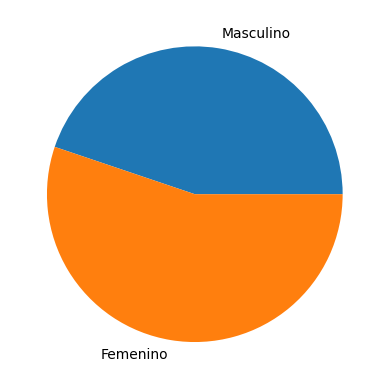

In [28]:
#encoded_dataset.plot.pie(y='Género', figsize=(5, 5))
y = np.array(dataset.pivot_table(index = ['Género'], aggfunc ='size'))
plt.pie(y, labels =dataset['Género'].unique())

# Models

# Training